In [2]:
import numpy as np
import pandas as pd
import math

In [5]:
def P_s(k, W_0, n):
    p_s = 0
    if n == 0:
        return 0
    for l in range (0, k + 1):
        p_s += (n*(W_0-l-1)**(n-1)/W_0**n)
    return p_s

In [44]:
N = 20
k = 6
W_0 = 16
Tper = 13360
summary = 0
for j in range (1, N + 1):
        summary += P_s(k, W_0, j)
        
 #sum  = lambda * Tper * N
_lambda = summary/(N + 1)/N/Tper
_lambda = 4.69169115218968e-05

In [45]:
q = 1-np.exp(Tper*(-_lambda)) # приход кадра
q 

0.46570648524816083

In [46]:
def Cbin(m, x, N):
    if (m + x > N):
        return 0
    return math.factorial(N - x)/math.factorial(N - x - m)/math.factorial(m)*q**m*(1-q)**(N - x -m)

In [47]:
n = np.arange(1, N + 1)
success = []
for i in range (1, N + 1):
    p = (P_s(k,W_0, i))
    success.append(p)
success.insert(0, 0)
success       #вероятность успеха от числа активных станций за 1 RAW-слот

[0,
 0.4375,
 0.65625,
 0.7587890625,
 0.7998046875,
 0.8084297180175781,
 0.8001651763916016,
 0.7832485884428024,
 0.7620516121387482,
 0.7388906567939557,
 0.7149906565609854,
 0.6909974796051301,
 0.6672500429083357,
 0.6439246510998986,
 0.6211114711690482,
 0.5988550063032839,
 0.5771754947495557,
 0.5560802140823761,
 0.5355694498931225,
 0.5156396478261369,
 0.4962850806008059]


# Проверка биноминального распределения

In [60]:
data = pd.read_csv("D:\IITP\Results\\active_test_poisson2.txt", sep = ',', header = None)
data.columns = ["Non_active_before adding" , "N_active_before", "Dropped", "N_active_after"]
#data.groupby(["Non_active_before adding"]).count()["N_active_before"]

Non_active_before adding
0        7
1       63
2      188
3      474
4      857
5     1277
6     1939
7     2580
8     3348
9     3921
10    4605
11    5272
12    5311
13    5741
14    5815
15    5818
16    5761
17    5839
18    5887
19    5876
20    5909
Name: N_active_before, dtype: int64

In [61]:
nactivbefore = list(data["N_active_after"])
nactivbefore.insert(0,0)
nactivbefore.pop()
poisson = pd.DataFrame(columns = ["came", "could", "before", "theor", "prac"])
poisson["came"] = data["N_active_before"] - nactivbefore
poisson["before"] = nactivbefore
nactivbefore = [(-1)*x + N for x in nactivbefore]
poisson["could"] = nactivbefore
variety = pd.DataFrame(columns = np.arange(0, N + 1), index = np.arange(0, N + 1))

In [63]:
variety = pd.DataFrame(columns = np.arange(0, N + 1), index = np.arange(0, N + 1))
# for i in range (len(poisson.index)):
#     poisson.iloc[i, 3] = Cbin(poisson.iloc[i, 0],poisson.iloc[i, 2], N )
    
for i in range(N + 1):
    for j in range (i + 1):
        #print("variaty that j ", j, "came when i active ", i, poisson[(poisson['came']== j) & (poisson['could'] == i)].count()[0]/poisson[poisson['could'] == i].count()[0])
        variety.iloc[i, j] = poisson[(poisson['came']== j) & (poisson['could'] == i)].count()[0]/poisson[poisson['could'] == i].count()[0]

real = pd.DataFrame(columns = np.arange(0, N + 1), index = np.arange(0, N + 1)) 
for i in range(N + 1):
    for j in range (i + 1):
        #print("variaty that j ", j, "came when i active ", i, poisson[(poisson['came']== j) & (poisson['could'] == i)].count()[0]/poisson[poisson['could'] == i].count()[0])
        if (i - j >= 0):
            real.iloc[i, j] = Cbin(j, N-i, N)      
        

In [64]:
variety

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.428571,0.571429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.297872,0.510638,0.191489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.158228,0.402954,0.324895,0.113924,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0875146,0.277713,0.362894,0.229872,0.042007,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.0415035,0.209867,0.32733,0.274863,0.128426,0.018011,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.0206292,0.122228,0.250129,0.323878,0.200103,0.0716864,0.0113461,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.0120155,0.074031,0.201163,0.283333,0.255814,0.134109,0.0341085,0.00542636,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.00776583,0.0439068,0.141577,0.241935,0.264636,0.203704,0.0755675,0.0191159,0.00179211,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.00280541,0.0298393,0.1038,0.199949,0.258607,0.225963,0.130069,0.0402958,0.00739607,0.00127518,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
real

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.534294,0.465706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.28547,0.497648,0.216883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.152525,0.398835,0.347637,0.101004,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0814929,0.284127,0.37148,0.215862,0.047038,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.0435411,0.189759,0.330799,0.288335,0.125661,0.0219059,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.0232637,0.121664,0.265116,0.308111,0.201419,0.0702251,0.0102017,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.0124297,0.0758385,0.198309,0.288088,0.251106,0.131323,0.038155,0.00475101,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.00664109,0.0463086,0.141274,0.246277,0.268328,0.187107,0.0815439,0.0203075,0.00221258,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.00354829,0.0278352,0.097048,0.197377,0.258059,0.224932,0.130705,0.0488257,0.0106395,0.00103041,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
N = 20
k = 6
W_0 = 16
n = np.arange(1, N + 1)
success = []
for i in range (1, N + 1):
    p = (P_s(k,W_0, i))
    success.append(p)
success.insert(0, 0)
success       #вероятность успеха от числа активных станций за 1 RAW-слот

# Обработка результатов измерений

In [119]:
N = 50
W_0 = 16
collected = pd.read_csv("D:\IITP\Results\\params_finder_ex3.txt", sep = ',', header = None)
collected.columns = ["Delivered per period", "Delivered part", "Stayed per period", "Stayed part", "Lambda", \
                                    "K", "Dropped per period", "Dropped part", "Total Delay"]

In [75]:
import matplotlib as mpl
import matplotlib.pyplot as plt

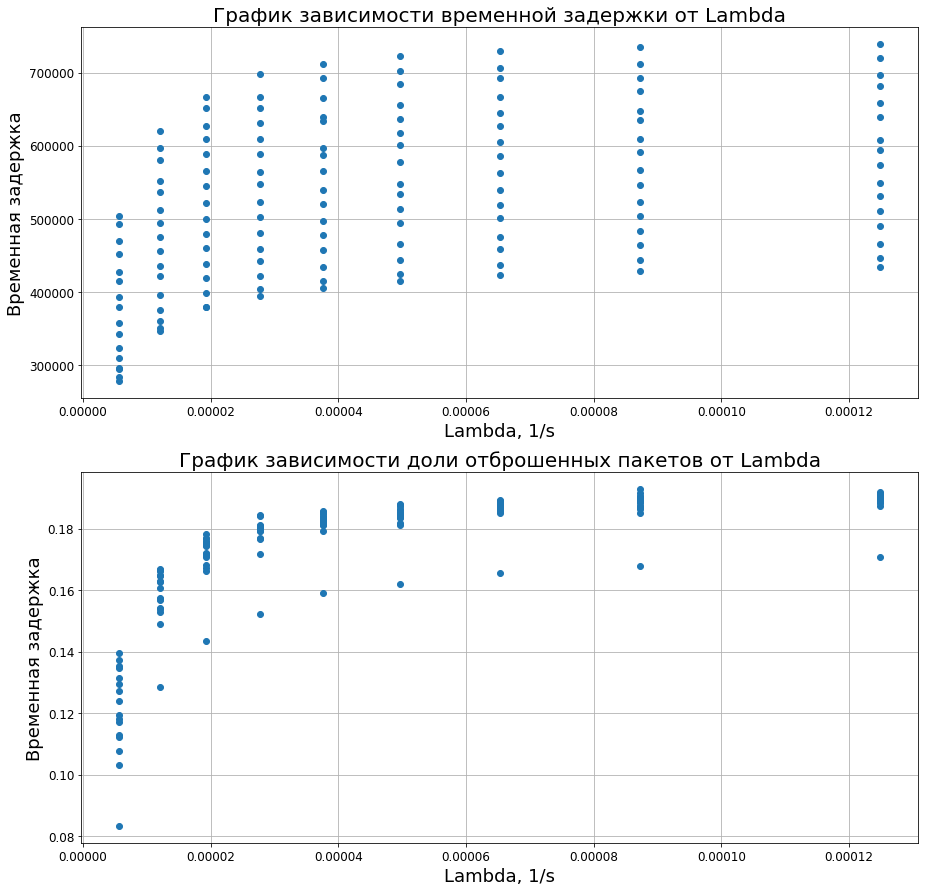

In [120]:
fig, ax = plt.subplots(figsize=(15, 15))
plt.subplot(2, 1, 1)

plt.plot(collected["Lambda"], collected["Total Delay"], marker='o',  linewidth=0)

plt.title('График зависимости временной задержки от Lambda', fontsize=20)
plt.xlabel('Lambda, 1/s', color='black', fontsize=18)
plt.ylabel('Временная задержка', fontsize=18)
plt.grid(True)

ax = plt.gca()
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
plt.subplot(2, 1, 2)
plt.plot(collected["Lambda"], collected["Dropped part"], marker='o',  linewidth=0)

plt.title('График зависимости доли отброшенных пакетов от Lambda', fontsize=20)
plt.xlabel('Lambda, 1/s', color='black', fontsize=18)
plt.ylabel('Временная задержка', fontsize=18)
plt.grid(True)

ax = plt.gca()
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
plt.show()
fig.savefig('D:\IITP\Results\comparison_3.png', dpi=200) 

In [ ]:
writer = pd.ExcelWriter("D:\IITP\Results\Txt_res.xlsx", engine='xlsxwriter')
collected.to_excel(writer, sheet_name='Sheet1')

# Get the xlsxwriter workbook and worksheet objects.
workbook  = writer.book
worksheet = writer.sheets['Sheet1']

# Add some cell formats.
format1 = workbook.add_format({'num_format': '#,##0.00'})
format2 = workbook.add_format({'num_format': '0%'})

# Note: It isn't possible to format any cells that already have a format such
# as the index or headers or any cells that contain dates or datetimes.

# Set the column width and format.
worksheet.set_column('B:B', 18, format1)

# Set the format but not the column width.
worksheet.set_column('C:C', None, format2)

# Close the Pandas Excel writer and output the Excel file.
writer.save()